In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
import apache_log_parser
from pprint import pprint
import os
from sklearn import preprocessing


In [15]:
df_S = pd.read_csv(f"{os.getcwd()}/wc_day73.csv")
df_S["date"] = pd.to_datetime(df_S["date"])
df_S

index                date  count
0            0 1998-07-06 22:00:01     68
1            1 1998-07-06 22:00:02    125
2            2 1998-07-06 22:00:03    108
3            3 1998-07-06 22:00:04    139
4            4 1998-07-06 22:00:05    171
...        ...                 ...    ...
105551  105551 1998-07-08 03:19:12    223
105552  105552 1998-07-08 03:19:13    203
105553  105553 1998-07-08 03:19:14    211
105554  105554 1998-07-08 03:19:15    199
105555  105555 1998-07-08 03:19:16    126

[105556 rows x 3 columns]

In [17]:
df_6S = df_S.groupby(pd.Grouper(key="date", freq="6S")).sum().reset_index()
df_6S

date   index  count
0     1998-07-06 22:00:00      10    611
1     1998-07-06 22:00:06      45   1135
2     1998-07-06 22:00:12      81   1068
3     1998-07-06 22:00:18     117   1113
4     1998-07-06 22:00:24     153   1135
...                   ...     ...    ...
17588 1998-07-08 03:18:48  633177   1123
17589 1998-07-08 03:18:54  633213   1150
17590 1998-07-08 03:19:00  633249   1212
17591 1998-07-08 03:19:06  633285   1240
17592 1998-07-08 03:19:12  527765    962

[17593 rows x 3 columns]

In [28]:
df_6S_date = (pd.to_datetime(df_6S["date"]).astype(int) / 10**9).array.reshape(-1, 1)
df_6S_count = df_6S["count"].array.reshape(-1, 1)

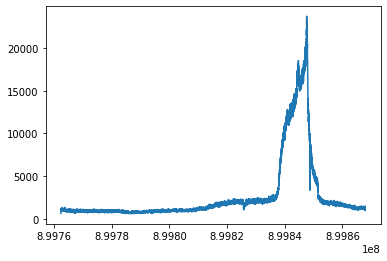

In [29]:
plt.plot(df_6S_date, df_6S_count)

In [41]:
df_6S_date = (pd.to_datetime(df_6S["date"]).astype(int) / 10**9).array.reshape(-1, 1)
df_6S_rolling_count = df_6S["count"].rolling(60).mean().array.reshape(-1, 1)

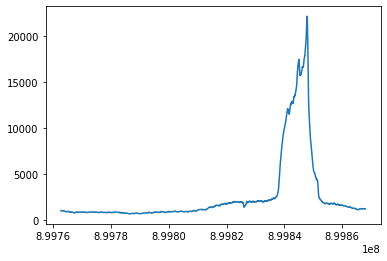

In [42]:
plt.plot(df_6S_date, df_6S_rolling_count)

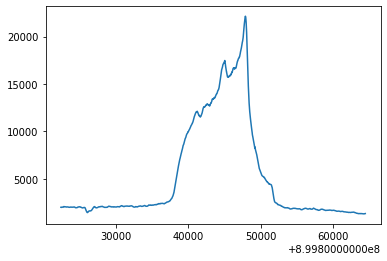

In [45]:
plt.plot(df_6S_date[10000:17000], df_6S_rolling_count[10000:17000])

IndexError: arrays used as indices must be of integer or boolean type

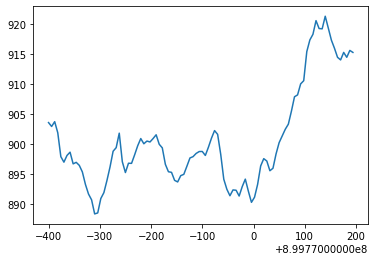

In [48]:
plt.plot(df_6S_date[1200:1300], df_6S_rolling_count[1200:1300])

samp, _ = nk.entropy_sample(df_6S_rolling_count[1200:1300])
samp

In [30]:
def compute_enet(alpha, l1_ratio, x_train, y_train):
    return ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(x_train, y_train)


def enet_loop(alpha, l1_ratio, x, y):
    counter = 9
    y_pred = pd.DataFrame([])
    for _index in range(int(x.size)):
        try:
            x_train = x[counter-9:counter]
            y_train = y[counter-9:counter]
            x_test = x[counter+1].reshape(-1, 1)
            enet = compute_enet(alpha, l1_ratio, x_train, y_train)
            target_y_pred = enet.predict(x_test)
            y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
        except Exception as e:
            print(e)
        counter += 1
    return y_pred

In [31]:
df_6S_y_pred  = enet_loop(1.0, 0.5, df_6S_date, df_6S_count)

/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_74442/3538463395.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_74442/3538463395.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_74442/3538463395.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_74442/3538463395.py:15: FutureWarning: The frame.append method is deprecat

index 17593 is out of bounds for axis 0 with size 17593
index 17594 is out of bounds for axis 0 with size 17593
index 17595 is out of bounds for axis 0 with size 17593
index 17596 is out of bounds for axis 0 with size 17593
index 17597 is out of bounds for axis 0 with size 17593
index 17598 is out of bounds for axis 0 with size 17593
index 17599 is out of bounds for axis 0 with size 17593
index 17600 is out of bounds for axis 0 with size 17593
index 17601 is out of bounds for axis 0 with size 17593
index 17602 is out of bounds for axis 0 with size 17593


/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_74442/3538463395.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_74442/3538463395.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_74442/3538463395.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_74442/3538463395.py:15: FutureWarning: The frame.append method is deprecat

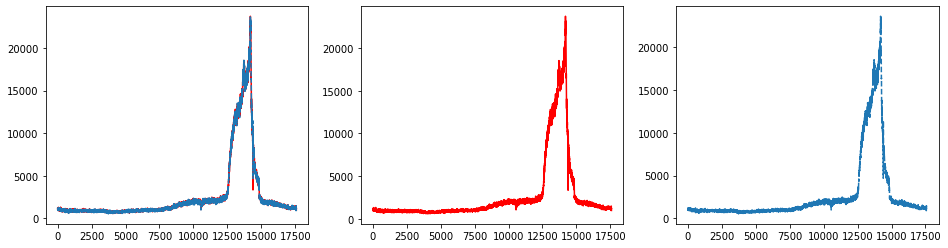

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes[0].plot(df_6S_count[9:], color='red')
axes[0].plot(df_6S_y_pred.applymap(lambda x: 0 if x < 0 else x), linestyle="dashed")
axes[1].plot(df_6S_count[9:], color='red')
axes[2].plot(df_6S_y_pred.applymap(lambda x: 0 if x < 0 else x), linestyle="dashed")

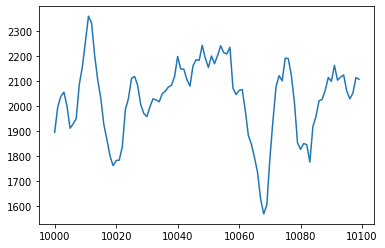

In [37]:
plt.plot(df_6S_y_pred[10000:10100])